# 机器学习工程师纳米学位
## 强化学习
## 项目 4: 训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个notebook文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答notebook文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的`agent.py`的实现来进行评分。 

>**提示：** Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的Q-Learning驾驶代理程序，它会操纵*智能出租车* 通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [3]:
from pylab import *
import pandas as pd
import re
import numpy as np

# Show the paramter list
def showParamsList( filename ):
    X = None
    C = None
    
    name = filename.split("-")
    
    pattern = re.compile("\d+[.\d+]*")
    match_number = re.compile('-?[0-9]+\.?[0-9]*(?:[Ee]-?[0-9]+)')
    
    epsilon = float(re.search(pattern, name[2], flags=0).group())
    a = float(re.search(pattern, name[4], flags=0).group())
    tolenrance = 0
    if len(name) == 10:
        tolenrance = re.search(pattern, name[8], flags=0).group()
        tolenrance = float('1e-' + str(name[9]))
    else:
        tolenrance = float(re.search(pattern, name[8], flags=0).group())
    
    formula = int(re.search(pattern, name[5], flags=0).group())
    if formula == 0:
        formula = 'self.a ** self.t'
        X = np.linspace(1, 386, 256, endpoint=True)
        C = a ** X
    elif formula == 1:
        formula = '1.0 / self.t ** 2'
        X = np.linspace(1, 386, 256, endpoint = True)
        C = 1 / X ** 2
    elif formula == 2:
        formula = 'math.e ** ( - self.a * self.t )'
        X = np.linspace(1, 386, 256, endpoint = True)
        C = math.e ** (-a * X)
    elif formula == 3:
        formula = 'math.cos( self.a * self.t )'
        X = np.linspace(1, 386, 256, endpoint = True)
        C = np.cos( a * X )
    else:
        formula = 'self.epsilon - 0.05'
        X = np.linspace(1, 40, 256, endpoint = True)
        C = epsilon - 0.05 * X
        
    state_space = int(re.search(pattern, name[6], flags=0).group())
    if state_space == 1:
        state_space = "(waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])"
    else:
        state_space = "(waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'], deadline)"
    
    print "epsilon : {}".format(epsilon)
    print "alpha : {}".format(re.search(pattern, name[3], flags=0).group())
    print "a : {}".format(a)
    print "depeey function : {}".format(formula)
    print "state space : {}".format(state_space)
    print "test count : {}".format(re.search(pattern, name[7], flags=0).group())
    print "tolenrance : {:.12f}".format( tolenrance )
    print "-------------------------------------------------------------"
    print "the trend graph of the epsilon:"
    plot(X,C)
    show()
    print "-------------------------------------------------------------"
    print "Below Is The Details:"
    vs.plot_trials( filename + '.csv')

In [4]:
from pylab import *
import pandas as pd
import re
import numpy as np

# Show the paramter list
def showParamsList2( filename ):
    X = None
    C = None
    
    name = filename.split("_")
    
    epsilon = float(name[3])
    a = float(name[5])
    tolenrance = float(name[9])
    
    formula = int(name[6])
    if formula == 0:
        formula = 'self.a ** self.t'
        X = np.linspace(1, 386, 256, endpoint=True)
        C = a ** X
    elif formula == 1:
        formula = '1.0 / self.t ** 2'
        X = np.linspace(1, 386, 256, endpoint = True)
        C = 1 / X ** 2
    elif formula == 2:
        formula = 'math.e ** ( - self.a * self.t )'
        X = np.linspace(1, 386, 256, endpoint = True)
        C = math.e ** (-a * X)
    elif formula == 3:
        formula = 'math.cos( self.a * self.t )'
        X = np.linspace(1, 386, 256, endpoint = True)
        C = np.cos( a * X )
    else:
        formula = 'self.epsilon - 0.05'
        X = np.linspace(1, 40, 256, endpoint = True)
        C = epsilon - 0.05 * X
        
    state_space = int(name[7])
    if state_space == 1:
        state_space = "(waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])"
    else:
        state_space = "(waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'], deadline)"
    
    print "epsilon : {}".format(epsilon)
    print "alpha : {}".format(name[4])
    print "a : {}".format(a)
    print "depeey function : {}".format(formula)
    print "state space : {}".format(state_space)
    print "test count : {}".format(name[8])
    print "tolenrance : {:.12f}".format( tolenrance )
    print "-------------------------------------------------------------"
    print "the trend graph of the epsilon:"
    plot(X,C)
    show()
    print "-------------------------------------------------------------"
    print "Below Is The Details:"
    vs.plot_trials( filename + '.csv')

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行`agent.py`代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

### 问题 1
用几句话，描述在运行默认的`agent.py`代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的`/smartcab/`目录（这个notebook所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

**回答：**
- 没有移动
- 获得什么样的奖励？
    - 当未正确做出相应的动作后，程序将获得相应的惩罚。
    - 当正确做出相应的动作后，程序将获得相应的奖励。
- 颜色改变对奖励的一项？
    - 绿灯时：驾驶代理程序发出不移动的命令，那么驾驶代理程序就会得到相应的惩罚，并且惩罚的力度要比奖励的力度大很多（2倍左右）。如果程序做出了相应的移动,并且做出的动作正确，那么代理程序就会得到一个奖励；如果不正确，代理程序就会得到相应的惩罚。
    - 红灯时：驾驶代理程序发出不移动的命令，那么驾驶代理程序会得到一个相应的奖励。如果代理程序此时移动了车子，那么代理驾驶程序就会得到相应的奖励。

### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的`/smartcab/`的目录下，有两个文件夹：`/logs/` （之后会用到）和`/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的Python文件，然后回答下面的问题。

### 问题 2
- *在*`agent.py`* Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？*
- *在*`simulator.py`* Python 文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别是什么?*
- *在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑南北方向还是东西方向?*

**回答：**
- 第一个问题：
    - **learning** : 控制当前代理驾驶程序是否可以学习的开关.False表示当前的程序不学习就直接执行，True表示当前的程序会先学习一下然后再执行相应测试操作
    - **epsilon** : 增强学习的本意是希望程序在开始学习的初期，是代理程序有很大的概率在训练的时候不只依赖于以获取状态中最大Q值得方式来获取相应的动作，而是有一定的几率随机获取动作，并且这个几率随着训练次数的增加而不断的减少。至于为什么有这样的操作，个人的理解是：由于在训练初期很容易出现，我学习了一次之后恰好发现第一个动作执行正确并且获得了一个正的奖励，如果我不加上这个随机动作选择的话，那么在后续的过程中我会一直执行这个动作（因为这个动作对应的Q值会一直保持最大），那么这个程序在后续的过程中就不会执行其它的动作，但是很可能存在我要是执行其它动作的话，其它动作获取到的奖励会比这个程序自以为最大值更大，所以加上了随机选择的率减函数。这样在开始的时候，通过这个随机函数，我可以尽可能多的尝试每个状态下的每个动作（因为是随机的不能够保证所有动作都一定执行到），这样我在通过Q值取判断动作的时候就能更加的合理；而随着训练次数的增加，我们可以认为我们的程序已经尝试了所有状态下的所有动作了，那么我们通过获取最大Q-Value值得方式来获取最大Q值得方式也就更加的合理，那么我们也就不需要在那么大概率随机选择动作了，我们会将这个随机选择动作的概率衰减到很小很小（可以说忽略不计），但是不能够把这个概率衰减到零，至于这一点的判断，个人的理解是：哪怕我们进行再怎么多的训练次数，我们也不能够完全保证所有的动作都尝试到，如果我们将其衰见到为0的话，那就意味着我们告诉代理程序——我们已经尝试了所有的动作了，接下来只需要根据我们的Q值取选择动作就可以了，但是实际真的是这样吗？显然不是。前边的一番说明已经把间接的描述了epsilon是怎么影响程序的。这里在说明一些，我们在选择epsilon的时候，要求取值的范围是(0——1],就是因为epsilon某种程度上是概率的表示，而概率的取值就是[0-1]闭区间，前边已经说明了0不能取得原因，所以应该为(0-1]。最后一点关于取值范围的理解与题目无关，在这写出来是希望审阅老师能够帮忙审阅一下该理解是否正确。
    - **alpha** : 表示每次动作执行完毕之后，我们应该以怎样的比例从旧值与新值之间进行学习。从这两个值中间学习的比例之和要等于1。
- 第二个问题：
    - **调用act函数**。该函数会根据程序中记录的各个代理程序的状态，交通灯的状态，以及主代理驾驶程序的状态（车头方向、起点与目的地、车左边道路的情况、车右边道路的情况、迎面驶来车辆的情况等各种通过sense()方法获取的状态）,来执行相应的动作，同时会根据当前执行的动作，判断驾驶代理程序所获取的奖励或惩罚返回给代理驾驶调用者。
- 第三个问题：
    - render_text()与render()的主要区别是：后者在运行的时候会有相应的显示界面来可视化的展示当前程序的模拟情况。但是在运行速度上，前者的运行速度要明显高于后者（不需要再额外的去绘制页面）。两者的主要功能都是将学习的结果通过文字或者图像的形式显示出来，render__text()就是将训练的相关信息显示在terminal上，render()是将结果通过GUI的形式显示出来（能够更加直观的显示相应的内容）。
- 第四个问题：
    - 程序会先考虑x轴方向————代表东西方向，然后才是考虑y轴上的内容————代表南北方向。

-----
## 实现一个基本的驾驶代理程序

创建一个优化Q-Learning的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是`None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者`'Forward'`（前进）。作为你的第一个实现，到`'choose_action()'`代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如`'self.learning'`和`'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。

可选的，你还可以通过将`'display'`标志设定为`False`来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有20个训练试验和10个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

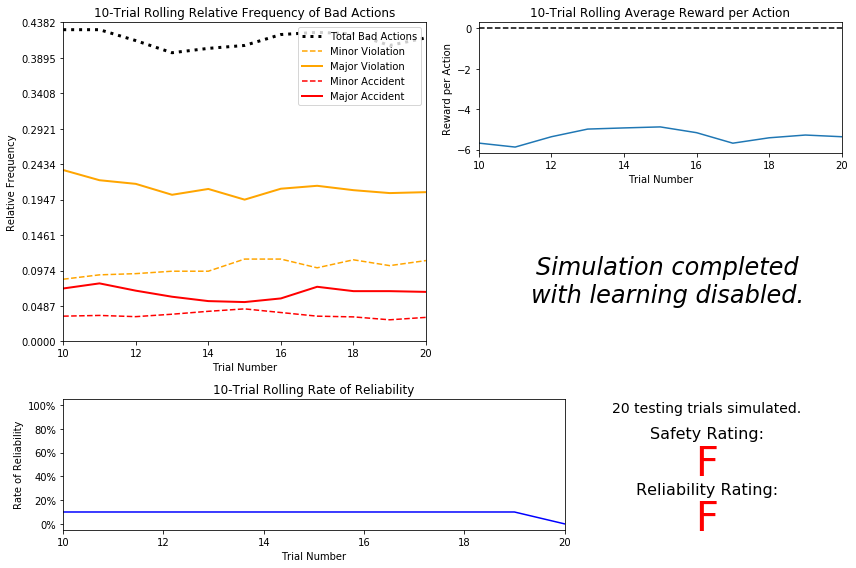

In [23]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**
- 第一个问题：
    - 从图中可以观测出代理程序做出不良决策（也就是Bad Actions）的频率非常的高。其中造成交通事故的比例在不良决策中的比例为8%-10%。
- 第二个问题：
    - 不合理。从表中我们可以得到随即驾驶的可靠性（Reliability Rating）的评分为F，评级最低。
- 第三个问题：
    - **作出良好决策**：代理程序会得到一个奖励；如果做出不良的决策的话，代理程序会得到一个严重的惩罚。
    - **做出不良决策**：代理程序会得到非常严重的惩罚。从图中我们可以得出，虽说代理程序做出不良决策的过程非常的严重，但是还是有50%以上的行为是良好的的行为，但是代理程序最终获取到的结果却都是惩罚，并且平均下来每个动作的惩罚值为-5，可以说从评分的角度来看，每个动作都是不良决策。
- 第四个问题：
    - 并没有特别大的重大变化。不管是从可靠性、不良决策的发生频率、平均每个动作的奖励或惩罚，所有的数据都稳定在一个相对比较平稳的范围。
- 第五个问题：
    - 不安全且不可靠。从最终的评分我们就可以得出安全性和可靠性的评分都为F——即意味着该代理程序的安全性和可靠性都是最低等级的，这种等级对于乘客来说是不安全且不可靠的。

-----
## 通知驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的`'如果这个处于这个状态就那个行动'`的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看`'build_state()'`代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回`None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**
- **第一个问题**：
    - 安全性最高的特征：light、left、right、oncoming。因为light、left、right、oncoming这四个特征是对智能出租车的安全性最为紧要的的特征。我们联想显示的场景，在不考虑交通事故的前提下，红绿灯的状态、驾驶代理程序对向行驶、左侧和右侧行驶情况都对汽车的动作判断有至关重要的意义。
    - 效率相关性最高的特征：deadline，waypoint。假设只有我们一辆车在道路上行驶，我们要在指定的时间中到达目的地，那么deadline肯定是我们需要关注的字段，waypoint也会影响时间的进程。举个例子：我们假设有两次运行起始点和目的地都是相同的，但是汽车的waypoint不同，那么显然在实际的运行中，他们要执行的动作步骤也是不同的，所以说waypoint也是与效率相关的。

- **第二个问题**:
    - waypoint的方向是决定汽车在执行下一个动作的时候所需要知道的重要标准，因为如果没有这个基准数据的话，那么其它的条件就没有存在的必要。因为无法判断汽车下一动作应该执行的情况。
    - inputs则是记录了一些车辆在运行过程涉及到的信息，涉及到一个车辆先行、后行等车辆运行的问题，如果这些问题不能很清楚的告知程序的话，很大的概率会出现事故。
  
- **第三个问题**：
    - 这里没有选择deadline有如下两点原因。
    - deadline的本质是计算曼哈顿距离，而这个距离的种类，在实际的情况中，是基于你仿真的网格的情况。deadline表示到达目的地还所需的剩余动作数目，前边我们已经说明计算的是曼哈顿距离，那么这里的deadline实际上可能表示不同出发点和目的地的情况，那么这个deadline实际上是有一定的泛化能力的————即一个deadline可能会表示很多种情况（出发点和目的地）。所以说deadline是可以泛化出很多情况的————即代表很多种不同出发点和目的地的情况。所以说这里不会选择使用deadline，因为我们在选择动作的时候是通过选择最大Q值来选择动作的，而deadline在实际的运行过程中对状态空间来说是一种干扰，因为它的泛化能力太强了。
    - deadline种类主要取决于界面网格的大小。假设我们去了一个$M * N$的网格，由于这里我们在计算的是曼哈顿距离，所以这里我们要想知道deadline的种类，就需要知道这个网格中的曼哈顿距离有多少种。经过分析，我们可以推测出一个网格中的曼哈顿距离是有最大的一个曼哈顿距离决定的，那么$M * N$的网格中，最大的曼哈顿距离为M + N，所以一个$M * N$的网格中的deadline的种类为M+N种。
    - 基于以上两点，如果我们将deadline加入到deadline中，deadline即增加了干扰项同时deadline的种类也比较多，如果再加上其它几个特征的话，那么状态空间就会呈几何倍数上升，这对程序来说就是一种负担。

### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.
发生如`(False, True, True, True, False, False, '3AM')`的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题4**中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**
- 所列出的特种中每种各特征的情况数如下：
    - waypoint 有四种情况：left, right, forward。观看程序，其给我们提供了四种情况，但是实际的情况中，我们不需要关注None这种情况，因为对于我们来说None意味着到达了终点，那么这种状态下代理程序也就不需要获取相应的操作了。
    - inputs.light有两种情况：True, False
    - inputs.left有两种情况：right, left, None, forward
    - inputs.oncoming 有两种情况：forward, right, None, left
    - inputs.right 有一种情况：right, None, forward, left
    - 状态空间的大小是：3 x 2 x 4 x 4 x 4 = 384
- 代理驾驶程序学到一个较好的策略？
    - 我们对上边的特征值进行对应的排列组合，这些组合已经可以代表在实际的模拟环境中可能会遇到的所有状态。加上我们的训练学习机制，可以保证我们在训练的过程中能够尝试过每一个状态下的每一个动作。如果我们做了合理数量的训练之后，也就意味着驾驶代理程序会经历过所有状态下的所有动作。代理程序根据在这种情况下训练得到的表格，一定可以学习到一个较好的策略。前边我们已经得出，我们的状态空间的大小为384种。如果再考虑到每个状态包含四个动作，如果代理程序要经历这些状态下的所有动作，那么意味着我们至少要经历384*4 = 1533次训练动作，但是考虑到在实际的训练过程中，我们是使用随机的方式来达到可以访问所有的动作的目的的，所以在实际的训练过程中，我们要经历比这更多的训练。再加上我们给出的奖励的随机性，可能同样状态下的不同动作a、b；可能执行a动作要比b动作更好，但是单次获得奖励可能会出现a比b高，所以我们至少要保证训练的次数应该在原有计算的基础的2倍还多。这里如果做初始估计的话，觉得3000正负100可能属于一个比较好的训练次数。而这个次数也比较合理。

### 更新驾驶代理程序的状态
要完成你的第二个实现，去到`'build_state()'`代理程序函数。根据你在**问题4**给出的判断，你现在要将`'state'`变量设定为包含所有Q-Learning所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：** 观察时记住重置模拟程序的标志到默认设定！

-----
## 实现Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是开始实现Q-Learning自身的功能。Q-Learning的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在Q-table里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的Q-value。当然，Q-Learning还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的Q-learning算法，不含折扣因子。遵从每个代理程序函数的**TODO**下的实现指导。

注意代理程序的属性`self.Q`是一个字典：这就是Q-table的构成。每个状态是`self.Q`字典的键，每个值是另一个字典，包含了*action*和*Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减*$\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$会向0减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当$\epsilon$达到特定阈值后（默认阈值为0.01），代理程序被以它所学到的东西来作检测。作为初始的Q-Learning实现，你将实现一个线性衰减$\epsilon$的函数。

### Q-Learning模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。

此外，使用下面的$\epsilon$衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

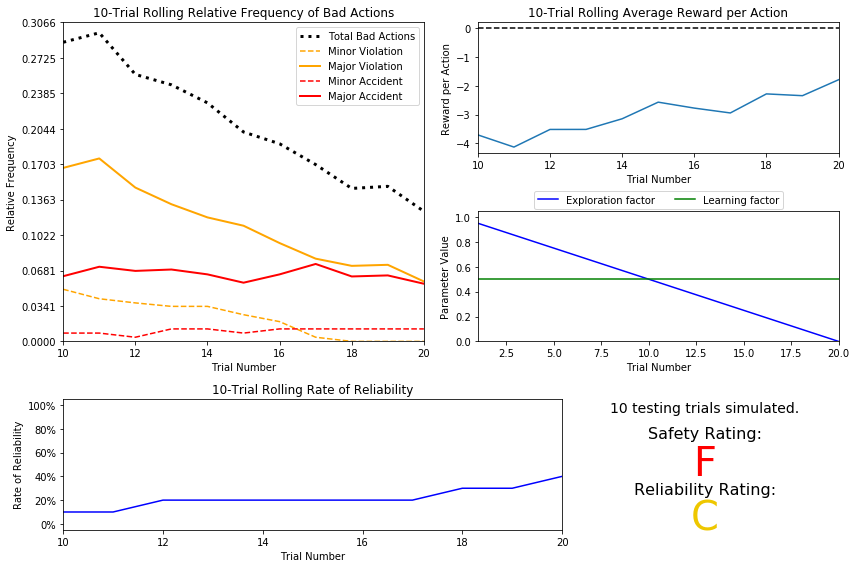

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的Q-Learning模拟中得到的可视化结果，像在**问题3**那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了Q-table存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的$\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的$\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

**回答：**
- 相似之处：
    - 两次驾驶代理程序在对动作做选择的时候，针对特殊情况都是用了相同的策略。如：针对策略给出的动作的值都是相同的情况下，如何选择一个动作。
    - 驾驶代理程序做出不良动作的概率都比较大。他们都只进行了20次的训练然后就开始测试。
- 20次。我们的epsilon的起始值是1，由于我们选择了如上所示的衰减函数，那么意味着我们的下降速率为0.05，而我们的tolerance的值为0.05;那么实际上应该运行的训练次数为( 1 - 0.05 ) / 0.05 = 19。19不等于20，所以说不合理。但是如果在仔细看一下程序的话，程序写明了要求必须训练20次。
- 准确的显示在界面，探索因子成一下负增长的直线。
- 整体的趋势来看，不良动作的数目成减少的趋势；平均奖励成增加的趋势。
- 训练过程有一定的随机性，有事会出现可靠性为C的情况，不过大多数情况下还是位于评分F。而从安全性来说，没有任何的提高，评分仍然为F。

在训练的过程中我们针对多个不同的动作的最大值相同的情况，我们采用从这些动作中采用随机选择。是因为，我们假设a、b两个动作对应的值相等且为最大值，由于我们在训练的过程中，奖励是随机的，我们并没有规定某一个动作的奖励是固定的；而且我们在学习的时候，是要结合旧值与新值，并取一个比例来讲这两部分的值进行结合，那么在实际的场景中就很容易出现a、b两个动作的值相同的，但是这并不能够说明a、b那个动作更好，只是说由于我们程序设计导致了这种巧合的出现，所以在这种情况下，我们采用随机的方式来选择动作，是每个动作都有被执行的可能。如果机械的使用第一个动作的话，这个操作会过于片面。

-----
## 改进Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是执行优化！现在Q-Learning算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果$\epsilon = 1$并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的Q-Learning实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进Q-Learning的模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。
- `'optimized'` - 将此标志设定为`'True'`来告诉驾驶代理你在执行一个优化版本的Q-Learning实现。

优化Q-Learning代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的学习率。
- `'epsilon'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是0.05）来设定测试的epsilon阈值。

此外，使用一个你选择的$\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到`'tolerance'`。Q-Learning代理程序到此才可以开始测试。某个衰减函数的例子($t$是试验的数目)：

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用$\alpha$ （学习率） 的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式$0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为A的评分。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

epsilon : 1.0
alpha : 0.5
a : 0.0004
depeey function : math.cos( self.a * self.t )
state space : (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])
test count : 1000
tolenrance : 0.000100000000
-------------------------------------------------------------
the trend graph of the epsilon:


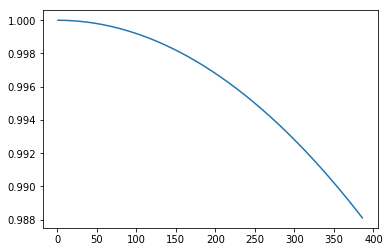

-------------------------------------------------------------
Below Is The Details:


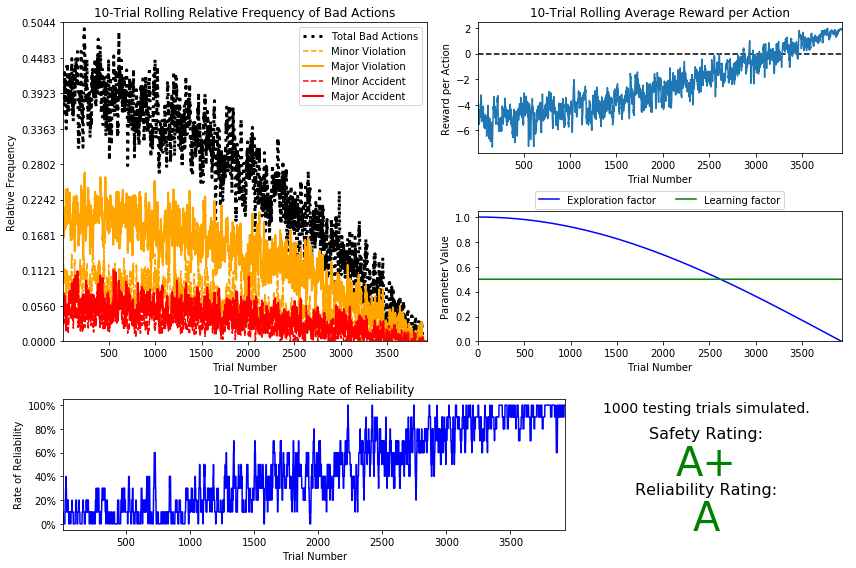

In [76]:
showParamsList2('sim_improved_learning_1_0.5_0.0004_3_1_1000_0.0001')

epsilon : 1.0
alpha : 0.5
a : 0.00078
depeey function : math.cos( self.a * self.t )
state space : (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])
test count : 1000
tolenrance : 0.000100000000
-------------------------------------------------------------
the trend graph of the epsilon:


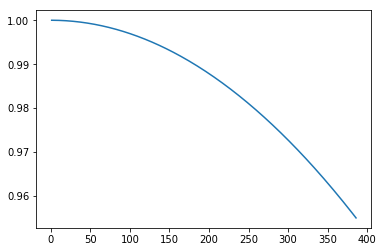

-------------------------------------------------------------
Below Is The Details:


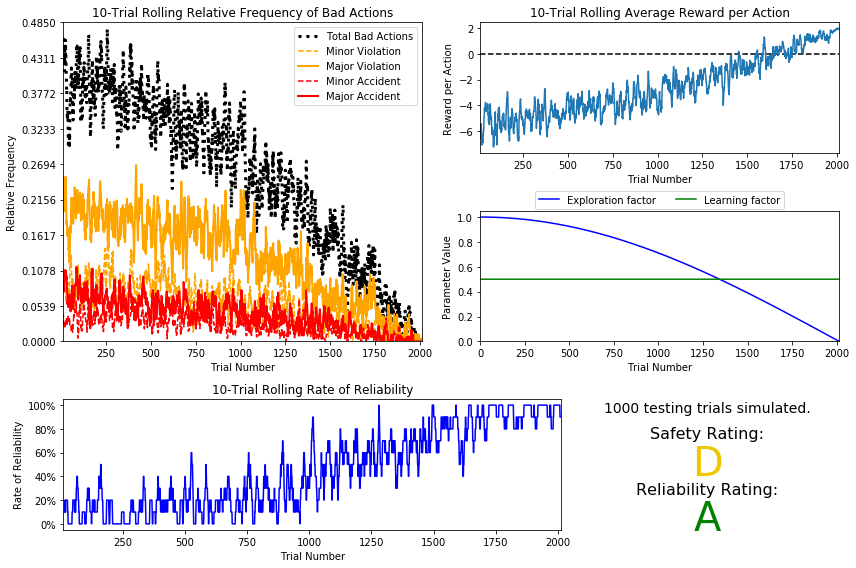

In [56]:
showParamsList2('sim_improved_learning_1_0.5_0.00078_3_1_1000_0.0001')

epsilon : 1.0
alpha : 0.3
a : 0.00078
depeey function : math.cos( self.a * self.t )
state space : (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])
test count : 10000
tolenrance : 0.000100000000
-------------------------------------------------------------
the trend graph of the epsilon:


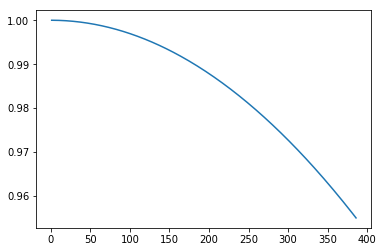

-------------------------------------------------------------
Below Is The Details:


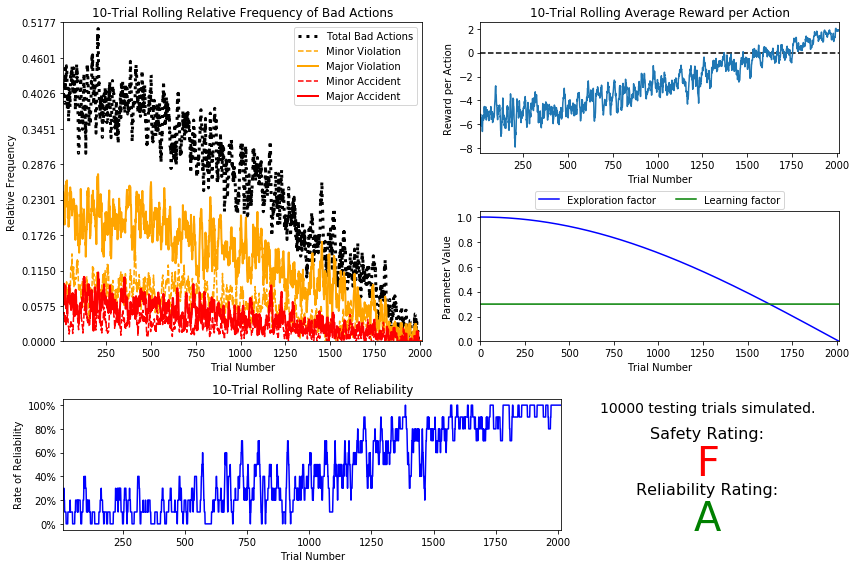

In [57]:
showParamsList2('sim_improved_learning_1_0.3_0.00078_3_1_10000_0.0001')

epsilon : 1.0
alpha : 0.11
a : 0.00078
depeey function : math.cos( self.a * self.t )
state space : (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'], deadline)
test count : 1000
tolenrance : 0.000100000000
-------------------------------------------------------------
the trend graph of the epsilon:


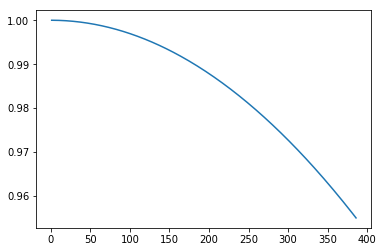

-------------------------------------------------------------
Below Is The Details:


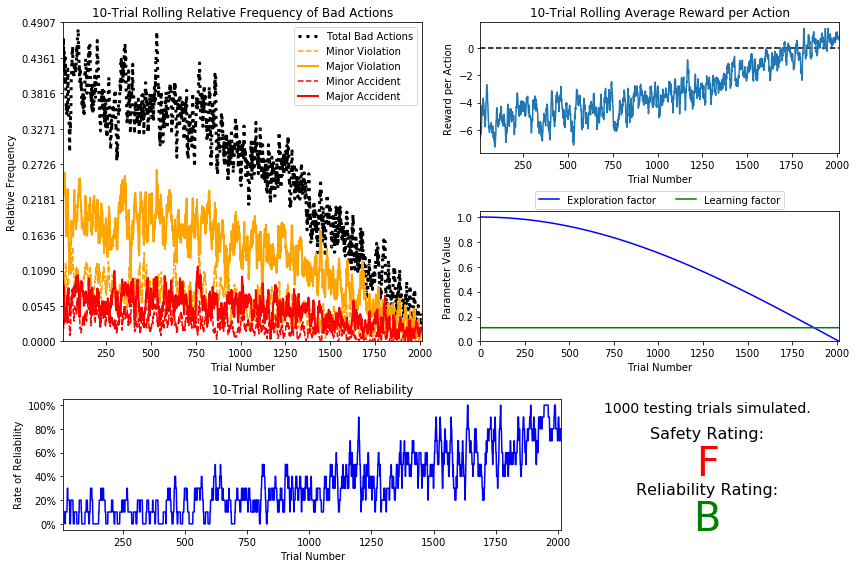

In [61]:
showParamsList2('sim_improved_learning_1_0.11_0.00078_3_0_1000_0.0001')

epsilon : 1.0
alpha : 0.8
a : 0.00078
depeey function : math.cos( self.a * self.t )
state space : (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])
test count : 10000
tolenrance : 0.000100000000
-------------------------------------------------------------
the trend graph of the epsilon:


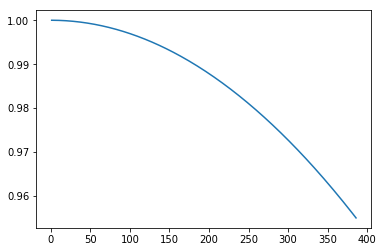

-------------------------------------------------------------
Below Is The Details:


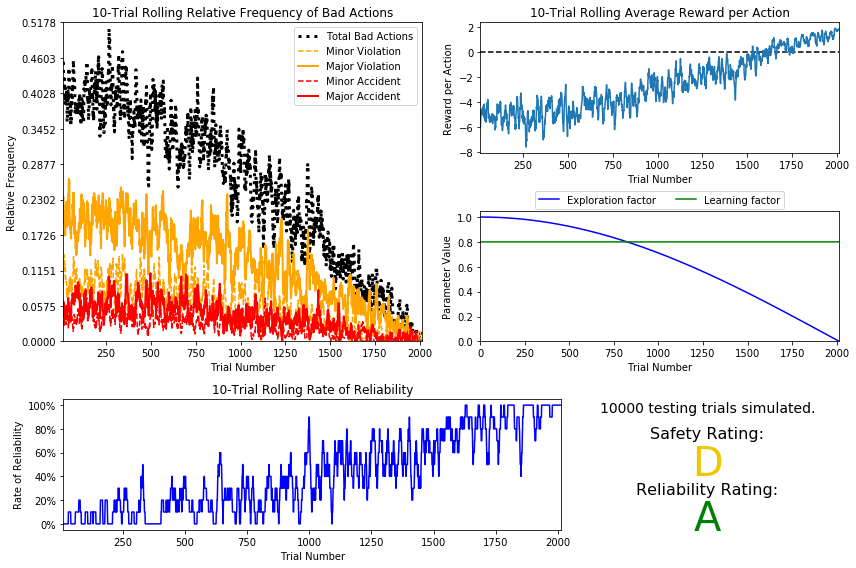

In [63]:
showParamsList2('sim_improved_learning_1_0.8_0.00078_3_1_10000_0.0001')

epsilon : 1.0
alpha : 0.5
a : 0.0004
depeey function : math.cos( self.a * self.t )
state space : (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])
test count : 1000
tolenrance : 0.000100000000
-------------------------------------------------------------
the trend graph of the epsilon:


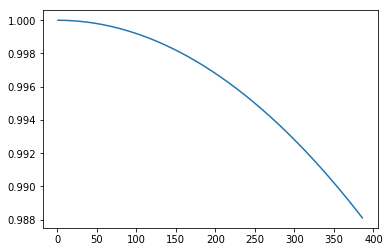

-------------------------------------------------------------
Below Is The Details:


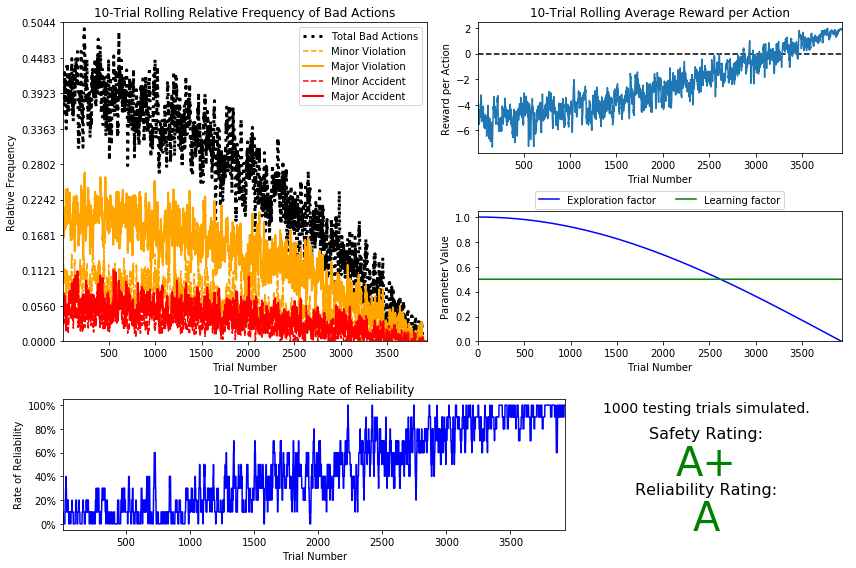

epsilon : 1.0
alpha : 0.8
a : 0.0004
depeey function : math.cos( self.a * self.t )
state space : (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])
test count : 1000
tolenrance : 0.000100000000
-------------------------------------------------------------
the trend graph of the epsilon:


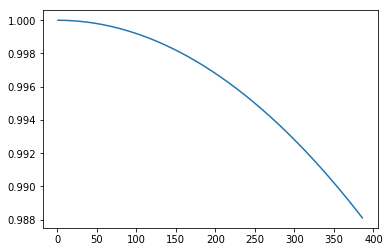

-------------------------------------------------------------
Below Is The Details:


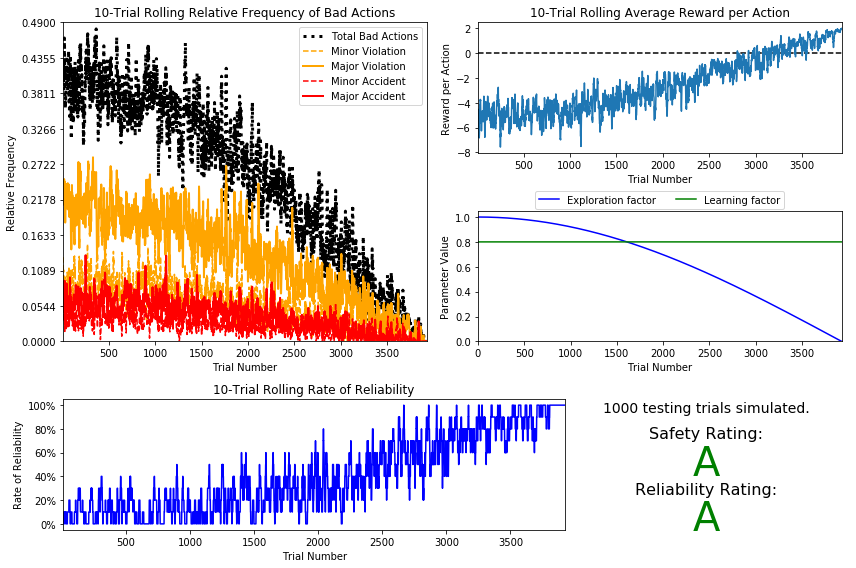

In [72]:
showParamsList2('sim_improved_learning_1_0.8_0.0004_3_1_1000_0.0001')

epsilon : 1.0
alpha : 0.3
a : 0.0004
depeey function : math.cos( self.a * self.t )
state space : (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])
test count : 1000
tolenrance : 0.000100000000
-------------------------------------------------------------
the trend graph of the epsilon:


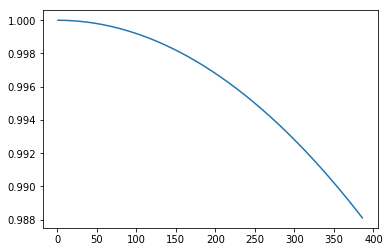

-------------------------------------------------------------
Below Is The Details:


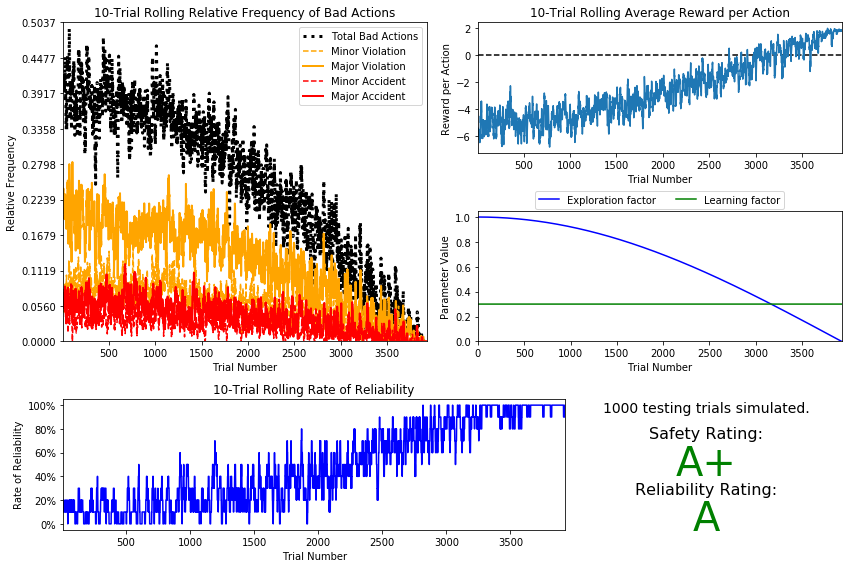

In [73]:
showParamsList2('sim_improved_learning_1_0.3_0.0004_3_1_1000_0.0001')

epsilon : 1.0
alpha : 0.5
a : 0.00031
depeey function : math.cos( self.a * self.t )
state space : (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])
test count : 1000
tolenrance : 0.000100000000
-------------------------------------------------------------
the trend graph of the epsilon:


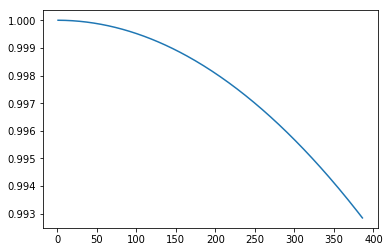

-------------------------------------------------------------
Below Is The Details:


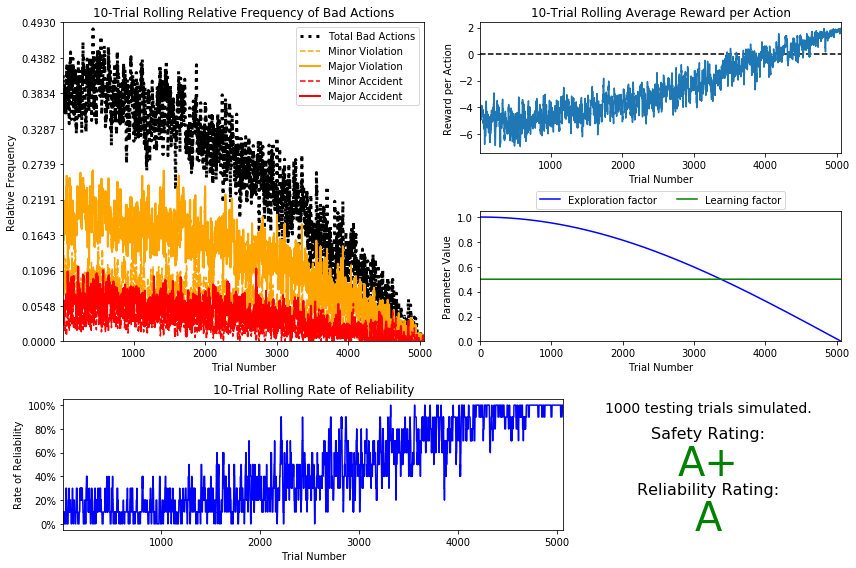

In [6]:
showParamsList2('sim_improved_learning_1_0.5_0.00031_3_1_1000_0.0001')

epsilon : 1.0
alpha : 0.3
a : 0.00016
depeey function : math.cos( self.a * self.t )
state space : (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])
test count : 1000
tolenrance : 0.000100000000
-------------------------------------------------------------
the trend graph of the epsilon:


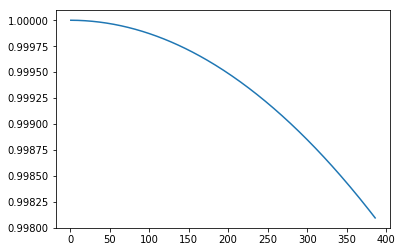

-------------------------------------------------------------
Below Is The Details:


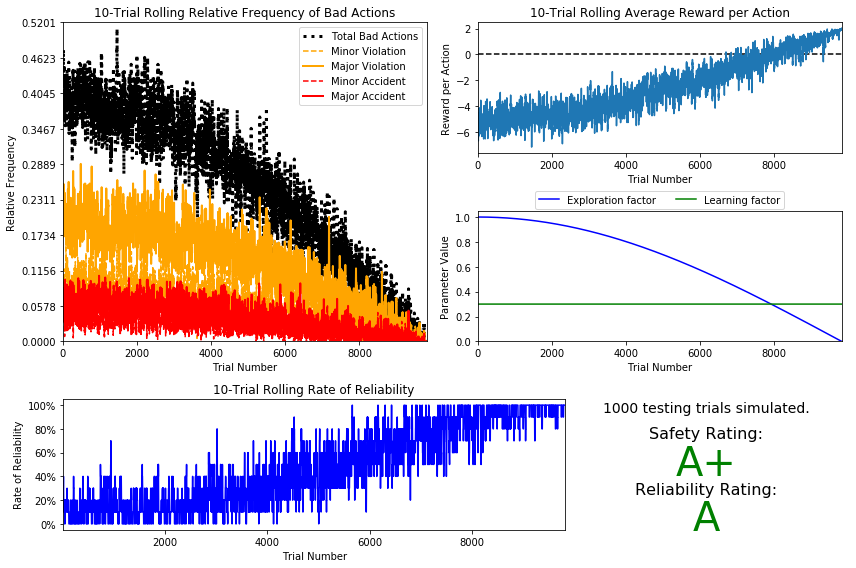

In [7]:
showParamsList2('sim_improved_learning_1_0.3_0.00016_3_1_1000_0.0001')

epsilon : 1.0
alpha : 0.5
a : 0.99
depeey function : self.a ** self.t
state space : (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])
test count : 1000
tolenrance : 0.000001000000
-------------------------------------------------------------
the trend graph of the epsilon:


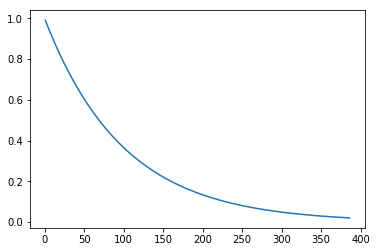

-------------------------------------------------------------
Below Is The Details:


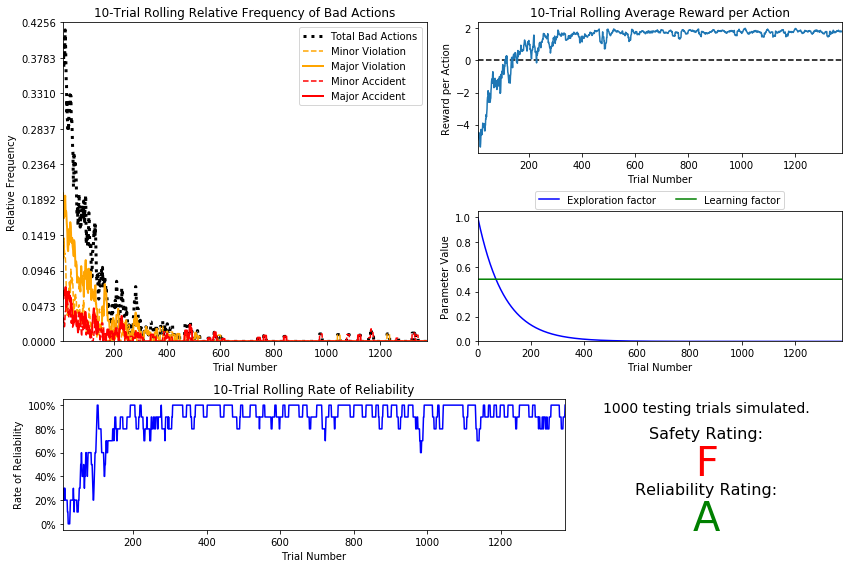

In [16]:
showParamsList2('sim_improved_learning_1_0.5_0.99_0_1_1000_1e-06')

### 问题7
利用上面的从你改进的Q-Learning模拟中得到的可视化结果，像在**问题6**那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么epsilon（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么epsilon-tolerance和alpha（学习率）值？为什么？*
- *与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？ *
- *你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

**回答：**
- 尝试了所有的衰减函数。并观看了所有函数的图形，前三个衰减函数都为凹函数，率将的趋势大致上是一样的，但是最后一个衰减函数与其它的其正相反，他是一个凸函数。前三个衰减函数在最开始训练的几百次中急剧下降到很小的值，然后开始平稳且很慢的下降。在本次的训练中的话，如果我们训练的次数为几百次的话，我们可以前三个函数，但是基于上边的分析还有实验结果我们可以发现，我们的训练次数一般都是会超过1000次的。考虑到我们训练的原则，我们希望在训练的过程前期有尽可能多的机会进行随机动作选择，而在后期这个概率要尽可能的小，而控制这个频率的参数就是衰减因子。如果考虑到这一点，我们会发现前三个函数其实并不符合我们的情况，只有最后一种符合我们的情况。

- 在测试之前大约需要进行2000次左右的训练，才能够使代理程序处于一个D级的评分，但是这个评分明显是不够的，

- 学习值：
    - epsilon-tolenrance选用的是1、0.0001。epsilon选用1是在最开始的时候，我们每个动作进行训练的机会都是平等的，那么也就意味着，我们执行某个动作不是根据Q-table进行的选择的，而是随机进行选择的，根据我们设计的动作选择逻辑，这里以1开始。epsilon选择这个动作结束时考虑到这个概率相对比较小、但是不为0。这里没有选择为0在前边的公式中已经做了相应的说明。
    - alpha这里主要尝试了不同层级的分数：0.99, 0.8、0.5、0.3、0.1, 0.11；选择了几个比较具有代表性意义的分数。希望通过这几个不同阶段的分数来看一下不同种类的情景会对训练造成什么样的影响。
  
- 如果但从结果来看可以相信。但是经过多次的运行，会发现这个过程具有一定的随机性，即同样的运行，可能上一次运行的比较成功，而下一次可能运行结果可能就不那么如意了。而且主要影响的是程序的安全性方面。

- 可靠性在1000次测试的情况下，总是没有训练到A+，是比较遗憾的一点。但是也没有找到相应的原因。

### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看`'sim_improved-learning.txt'`文本文件，看你的改进的Q-Learning算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。

**回答：** 
- 代理驾驶程序能够做出一系列的动作，

**回答：** 
- 最优策略：
    - 最优安全性策略：代理驾驶程序能够使小车做出正确的动作。
    - 左右稳定性策略：代理驾驶程序能够使小车准时到达目的地。
- 如下就存在一个不是最优策略的策略：
    - ('left', 'green', 'forward', 'forward', 'forward') -- forward : 0.64 -- None : -5.12 -- right : 0.97 -- left : -20.21'。
    - 如上所示的状态是，当出租车需要向左行驶时，对向路口、左侧路口、右侧路口都是直向行驶小车。这种情况下，小车按照正常的安全性和稳定性来说应该是不行动是最优的。出现这样的情况应该是由于我们的系统在设计奖励机制的时候导致的。而这种情况的出现也是导致了当我们测试的次数增多的时候，我们的稳定性始终得不到A+的原因。
    
- 状态-动作记录：
    - ('forward', 'green', 'right', 'left', 'left') -- forward : 1.54 -- None : 0.90 -- right : 0.39 -- left : 0.74
    - 小车当前的状态是：向左行驶，路灯，左侧路口的车辆要向右行驶，右侧路口的车辆要向左行驶，对向路口的车辆要向右行驶。根据我们的驾驶规则，直向的车辆有优先行驶权，所以右侧路口向左行驶的车辆不能够向左行驶，而其它两个路口的车辆行驶的方向不会对小车造成影响，所以forward是最优策略。即安全又稳定。

-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为Q-Learning算法的一部分，之前要求你在实现中**不要**使用折扣引子`'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给Q-value带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个Q-Learning算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**
- 智能出租车在训练的时候，每一次的起点和终点是不同的，那么意味着我们每次训练时奖励的扩散也是不一样的。而我们如果要使用上gamma参数的话，意味着我们认为两次的训练下环境是相同的，有一定的关联。而针对当前的情况，后一次训练的扩散和前一次训练的扩散是没有帮助的。两次训练所经历过的状态序列都可能是不一样的，这样后一次训练就对前一次的没有实际的意义了
- 对于智能出租车来说，未来奖励对于**智能出租车要尽可能快的到达目的地**这个特点是不会起作用的。由于对于智能出租车来说不管是安全性还是可靠性来说归根结底都是通过获取相应的奖励来实现的，如果加上未来奖励的话，那么基于此相当于是告知智能出租车走的越多奖励就越多，那么对于可靠性就会有影响，所以未来奖励对于智能出租车本身是没有意义的。
- 针对环境来说。假设智能出租车处于某一个状态，对于出租车来说当前状态是一定的，但是出租车走位的情况是不一样的，可能我们进行第一次训练的时候，我们周遭的情况是状态a，但是在第二次训练（假设发生的状态都是一样的），他就可能就会变成b，这样就意味着我们进行两次训练，如果当前的状态一样，但那时未来的状态却不一样，那我们应该以那一次为准呢？我们应该学习那一次呢？而代表环境的三个状态left、right、oncoming都是这样的情况。
- 综上所述未来奖励在当前的智能出租车训练中没有什么实际学习意义，既然学习他都没有意义了，我们还学习什么，只有不学习了。

> **注意**:当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。